<a href="https://colab.research.google.com/github/citaakml/hello-world/blob/main/CASE_BASED_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

# Ikhtisar Data

In [166]:
dataset = pd.read_csv('/content/Country-data.csv')
dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [167]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [168]:
dataset.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [169]:
dataset.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [170]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [171]:
col = list(dataset.columns)
categorical = ['country']
numerical = [*col]
print('Data Kategorikal :',*categorical)
print('Data Numerikal :',*numerical)

Data Kategorikal : country
Data Numerikal : country child_mort exports health imports income inflation life_expec total_fer gdpp


# Pre-processing Data

**Data Scaling**

In [172]:
#def normalization(data):
#  return data - data.min() / data.max() - data.min()

#dataset = normalization(dataset)
#dataset
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
#drop column country
country_scale = min_max_scaler.fit_transform(dataset.drop('country',axis=1))
country_scale_df = pd.DataFrame(data = country_scale,
                               columns=dataset.columns[1:])
country_scale_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


Melakukan Feature Reduction dengan PCA ke 3D

In [173]:
from sklearn.decomposition import PCA
country_pca = PCA(n_components=3).fit(country_scale).transform(country_scale)
country_pca= pd.DataFrame(data = country_pca, columns = ['component 1', 'component 2',
                                                        'component 3'])
country_pca.head()

,component 1,component 2,component 3
0,-0.599078,0.095490,0.157554
1,0.158474,-0.212092,-0.064189
2,0.003686,-0.135867,-0.134182
3,-0.650235,0.275975,-0.142672
4,0.200711,-0.064662,-0.100715


**K-Means Clustering**

Membuat visualisasi untuk elbow method, untuk mengetahui berapa K terbaik yang akan digunakan pada pengolahan dataset. 

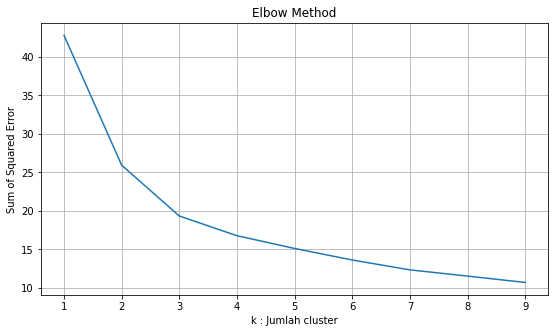

In [174]:
from sklearn.cluster import KMeans
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(country_scale)
    sse[k] = kmeans.inertia_
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Jumlah cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

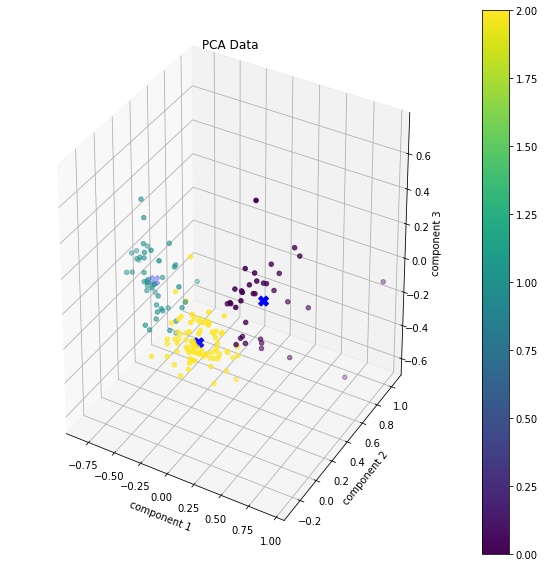

In [175]:
#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=101)
y_kmeans = kmeansmodel.fit_predict(country_pca)
cluster = kmeansmodel.cluster_centers_
centroids = np.array(cluster)
labels = kmeansmodel.labels_
dataset['class'] = labels; country_pca['class'] = labels

x = country_pca['component 1'].values
y = country_pca['component 2'].values
z = country_pca['component 3'].values

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='b', s=100)
fg = ax.scatter3D(x, y, z, c = labels, cmap = "viridis")
plt.title("PCA Data")
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
plt.colorbar(fg)

# Evaluation

Menerapkan kmeans cluster ke data lalu melabelkan setiap country kedalam cluster tersebut

In [176]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(country_pca)
dataset['cluster'] = kmeans.labels_
dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,1


Cluster 0

In [177]:
dataset[dataset['cluster'] == 0][:10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class,cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2,0
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,2,0
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,2,0


Cluster 1

In [178]:
dataset[dataset['cluster'] == 1][:10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class,cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1,1


Cluster 2

In [179]:
dataset[dataset['cluster'] == 2][:10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class,cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0,2
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0,2
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0,2
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,0,2
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0,2
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0,2
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,0,2
